In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv("C:\\Users\\acer\Desktop\\INTERN STAGE 2\\loan\\Loan 1.csv")
df

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,...,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,...,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,...,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,...,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,...,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,C-9076,Tobias Davilla,F,19,1349.60,Low,Commercial associate,NaN,Semi-Urban,156766.97,...,4.0,684.32,0,Inactive,681,1349.60,4,Semi-Urban,1,212778
19996,C-17587,Evelina Hodges,M,22,2019.78,Low,Working,Core staff,Urban,47924.80,...,NaN,706.34,0,Inactive,213,2019.78,4,Urban,1,90816.95
19997,C-46479,Karlyn Mckinzie,M,19,2252.03,Low,Working,Core staff,Semi-Urban,18629.88,...,1.0,656.46,0,Inactive,270,2252.03,2,Rural,0,21566.27
19998,C-3099,Mariana Pulver,F,21,1845.35,Low,Working,NaN,Semi-Urban,95430.73,...,2.0,865.46,0,Unpossessed,489,1845.35,1,Semi-Urban,1,120281.17


In [16]:
df.shape

(20000, 23)

In [17]:
df.drop_duplicates()
print(df["Customer ID"].duplicated().any())

False


In [18]:
df.dtypes


Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                    object
Property Price                  object
dtype: object

In [19]:
print(df.isnull().sum())

Customer ID                       0
Name                              0
Gender                           31
Age                               0
Income (USD)                    750
Income Stability                813
Profession                        0
Type of Employment             4689
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property ID                       0
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                      0
Property Price                    0
dtype: int64


In [20]:
an=df.fillna({"Gender":"Rather not say"})

In [21]:
print(an.isnull().sum())

Customer ID                       0
Name                              0
Gender                            0
Age                               0
Income (USD)                    750
Income Stability                813
Profession                        0
Type of Employment             4689
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property ID                       0
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                      0
Property Price                    0
dtype: int64


In [22]:
#Using interQuantile Range method to handle outliers 

<Axes: >

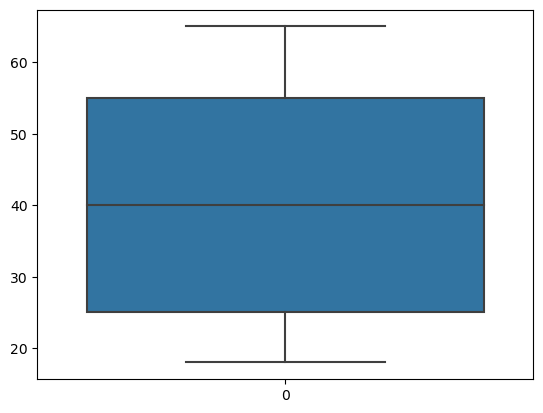

In [23]:
sns.boxplot(an["Age"]) #no outliers detected 

<Axes: >

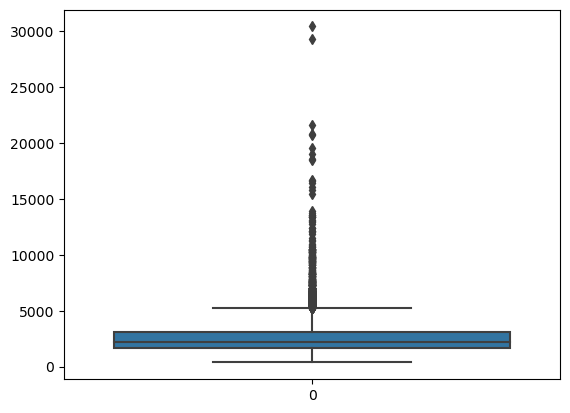

In [24]:
sns.boxplot(an["Income (USD)"])

In [25]:
#Finding the no of outliers
dn = pd.DataFrame(an)
first_quartile = dn["Income (USD)"].quantile(0.25)
third_quartile = dn["Income (USD)"].quantile(0.75)
interquartile_range = third_quartile - first_quartile
upper_bound = float(third_quartile + 1.5 * interquartile_range)
lower_bound = float(first_quartile - 1.5 * interquartile_range)
outliers = dn[(dn["Income (USD)"] < lower_bound) | (dn["Income (USD)"] > upper_bound)]["Income (USD)"]
print("Number of outliers:", outliers.shape[0])

Number of outliers: 831


<Axes: >

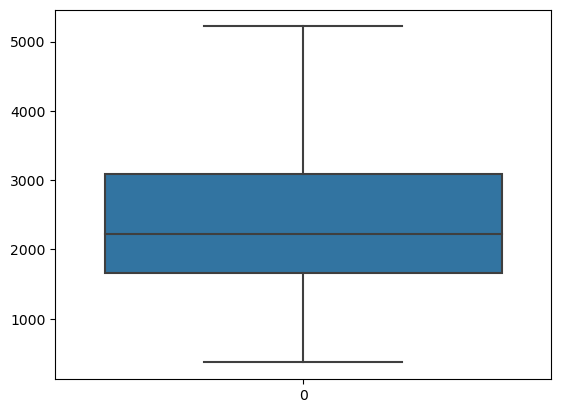

In [26]:
#Removing the outliers 

dn["Income (USD)"] = dn["Income (USD)"].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(dn["Income (USD)"])

In [27]:
#Replacing the null values with the median value
dn['Income (USD)'].fillna(value=dn['Income (USD)'].median(),inplace=True)
dn.isnull().sum()

Customer ID                       0
Name                              0
Gender                            0
Age                               0
Income (USD)                      0
Income Stability                813
Profession                        0
Type of Employment             4689
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property ID                       0
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                      0
Property Price                    0
dtype: int64

In [28]:
#filling the null values with the mode for Income Stability as it has non-numeric values
dn["Income Stability"].fillna(dn["Income Stability"].mode()[0],inplace=True)
dn.isnull().sum()

Customer ID                       0
Name                              0
Gender                            0
Age                               0
Income (USD)                      0
Income Stability                  0
Profession                        0
Type of Employment             4689
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property ID                       0
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                      0
Property Price                    0
dtype: int64

In [29]:
#filling the null values in Type of Employment column as Unknown as no data is given and considering mean is not meaningful 
dn.fillna({"Type of Employment":"Unknown"},inplace=True)
dn.isnull().sum()

Customer ID                       0
Name                              0
Gender                            0
Age                               0
Income (USD)                      0
Income Stability                  0
Profession                        0
Type of Employment                0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property ID                       0
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                      0
Property Price                    0
dtype: int64

<Axes: >

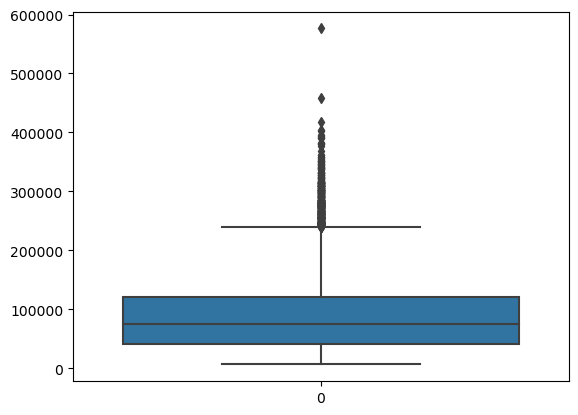

In [30]:
#Loan Amount Request (USD) is a numeric value so boxplot is possible to check outliers
sns.boxplot(dn["Loan Amount Request (USD)"])

In [31]:
#Finding the no of outliers
first_quartile_loan1 = dn["Loan Amount Request (USD)"].quantile(0.25)
third_quartile_loan1 = dn["Loan Amount Request (USD)"].quantile(0.75)
interquartile_range_loan1 = third_quartile_loan1 - first_quartile_loan1
upper_bound_loan1 = float(third_quartile_loan1 + 1.5 * interquartile_range_loan1)
lower_bound_loan1 = float(first_quartile_loan1 - 1.5 * interquartile_range_loan1)
outliers_loan1 = dn[(dn["Loan Amount Request (USD)"] < lower_bound_loan1) | (dn["Loan Amount Request (USD)"] > upper_bound_loan1)]["Loan Amount Request (USD)"]
print("Number of outliers in Loan Amount Request (USD):", outliers_loan1.shape[0])

Number of outliers in Loan Amount Request (USD): 511


<Axes: >

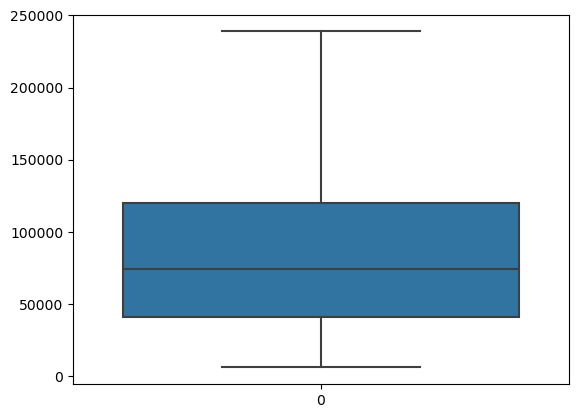

In [32]:
#After removing the outliers
dn["Loan Amount Request (USD)"] = dn["Loan Amount Request (USD)"].clip(lower=lower_bound_loan1, upper=upper_bound_loan1)
sns.boxplot(dn["Loan Amount Request (USD)"])

<Axes: >

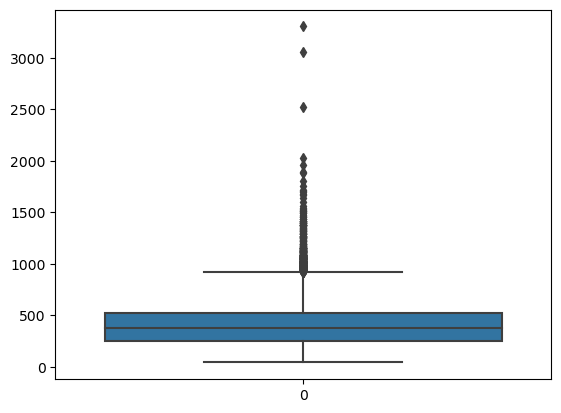

In [33]:
sns.boxplot(dn["Current Loan Expenses (USD)"])

In [34]:
#checking the no of outliers
first_quartile_expense2 = dn["Current Loan Expenses (USD)"].quantile(0.25)
third_quartile_expense2 = dn["Current Loan Expenses (USD)"].quantile(0.75)
interquartile_range_expense2 = third_quartile_expense2 - first_quartile_expense2
upper_bound_expense2 = float(third_quartile_expense2 + 1.5 * interquartile_range_expense2)
lower_bound_expense2 = float(first_quartile_expense2 - 1.5 * interquartile_range_expense2)
outliers_expense2 = dn[(dn["Current Loan Expenses (USD)"] < lower_bound_expense2) | (dn["Current Loan Expenses (USD)"] > upper_bound_expense2)]["Current Loan Expenses (USD)"]
print("Number of outliers in Current Loan Expenses (USD):", outliers_expense2.shape[0])

Number of outliers in Current Loan Expenses (USD): 486


<Axes: >

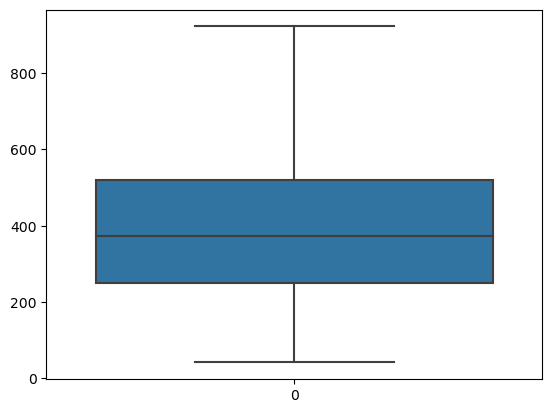

In [35]:
#After removing the outliers
dn["Current Loan Expenses (USD)"] = dn["Current Loan Expenses (USD)"].clip(lower=lower_bound_expense2, upper=upper_bound_expense2)
sns.boxplot(dn["Current Loan Expenses (USD)"])

In [36]:
dn.isnull().sum()

Customer ID                       0
Name                              0
Gender                            0
Age                               0
Income (USD)                      0
Income Stability                  0
Profession                        0
Type of Employment                0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property ID                       0
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                      0
Property Price                    0
dtype: int64

In [37]:
#as 83 null values are present we have to fill it with the median value
dn.fillna(dn['Current Loan Expenses (USD)'].median(),inplace=True)

In [38]:
dn.fillna({"Property Location":"Unknown"},inplace=True) #filling the na values for better analysis
dn.fillna({"Has Active Credit Card":"Unknown"},inplace=True)

In [39]:
dn.drop(columns=["Expense Type 1","Expense Type 2"],inplace=True) #removing these columns as it is not necessary for analysis 

In [40]:
# Replace "?" with NaN
dn["Co-Applicant"].replace("?", np.nan, inplace=True)
dn["Property Price"].replace("?", np.nan, inplace=True)

# Convert to numeric
dn["Co-Applicant"] = pd.to_numeric(dn["Co-Applicant"])
dn["Property Price"] = pd.to_numeric(dn["Co-Applicant"])



<Axes: >

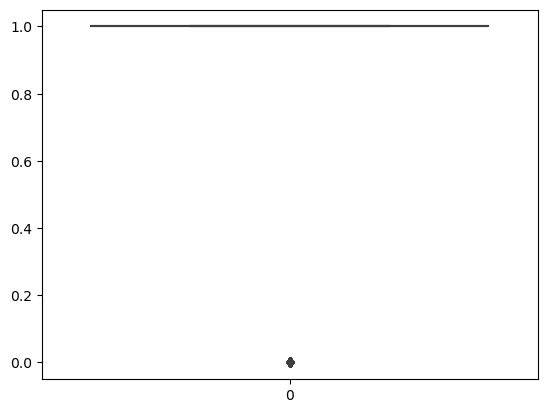

In [41]:
sns.boxplot(dn["Property Price"])

In [42]:
first_quartile = dn["Property Price"].quantile(0.25)
third_quartile = dn["Property Price"].quantile(0.75)
interquartile_range = third_quartile - first_quartile
upper_bound = float(third_quartile + 1.5 * interquartile_range)
lower_bound = float(first_quartile - 1.5 * interquartile_range)
outliers = dn[(dn["Property Price"] < lower_bound) | (dn["Property Price"] > upper_bound)]["Property Price"]
print("Number of outliers:", outliers.shape[0])

Number of outliers: 2919


<Axes: >

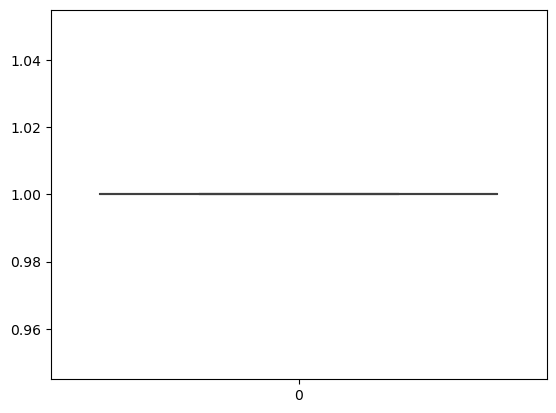

In [43]:
dn["Property Price"] = dn["Property Price"].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(dn["Property Price"])

In [44]:
dn['Property Price'].fillna(value=dn['Property Price'].median(),inplace=True)
dn.isnull().sum()

Customer ID                     0
Name                            0
Gender                          0
Age                             0
Income (USD)                    0
Income Stability                0
Profession                      0
Type of Employment              0
Location                        0
Loan Amount Request (USD)       0
Current Loan Expenses (USD)     0
Dependents                      0
Credit Score                    0
No. of Defaults                 0
Has Active Credit Card          0
Property ID                     0
Property Age                    0
Property Type                   0
Property Location               0
Co-Applicant                   77
Property Price                  0
dtype: int64

<Axes: >

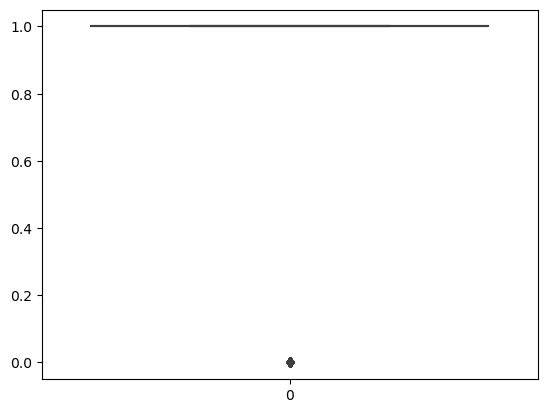

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()sns.boxplot(dn["Co-Applicant"])

In [46]:
dn['Co-Applicant'].fillna(value=dn['Co-Applicant'].median(),inplace=True)
dn.isnull().sum()

Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
dtype: int64

In [47]:
dn.shape

(20000, 21)

In [48]:
dn.dtypes

Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                   float64
Property Price                 float64
dtype: object

In [49]:
dn.head(100)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,...,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1.0,1.0
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,...,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1.0,1.0
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,Unknown,Semi-Urban,176684.91,...,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1.0,1.0
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,Unknown,Rural,97009.18,...,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0.0,1.0
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,Unknown,Urban,109980.00,...,374.0,374.00,0,374.0,356,1939.23,4,Semi-Urban,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,C-43113,Ming Libbey,F,23,2074.75,Low,Working,Secretaries,Rural,63473.60,...,2.0,690.69,0,Active,827,2074.75,3,Urban,1.0,1.0
96,C-27336,Desire Goodson,M,38,2035.81,Low,Working,Security staff,Semi-Urban,129400.28,...,2.0,806.34,1,Unpossessed,689,2035.81,3,Rural,1.0,1.0
97,C-36772,Nolan Drewry,M,33,2439.78,Low,Commercial associate,High skill tech staff,Rural,66551.42,...,2.0,739.47,0,Unpossessed,912,2439.78,2,Rural,1.0,1.0
98,C-3197,Rufus Chi,M,44,2326.88,Low,Commercial associate,Laborers,Semi-Urban,16263.39,...,2.0,668.53,0,Active,154,2326.88,1,Rural,1.0,1.0


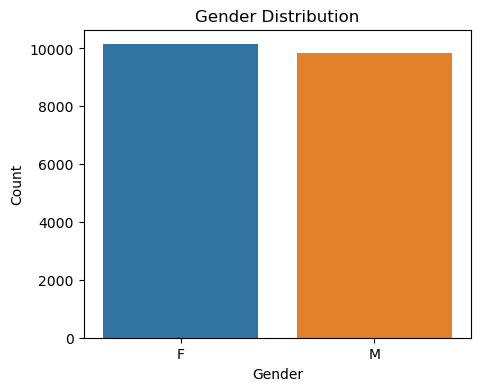

In [52]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

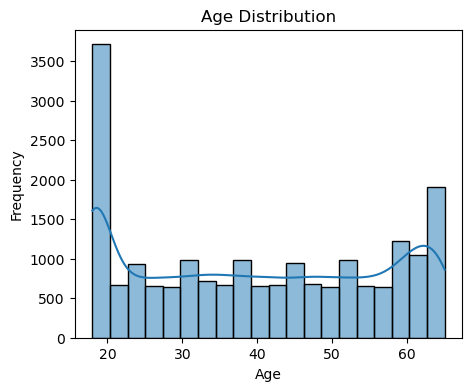

In [80]:
plt.figure(figsize=(5,4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

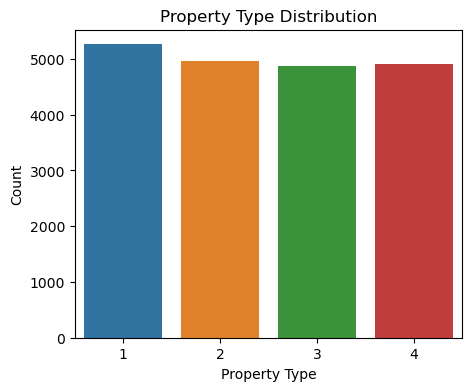

In [79]:
# Bar Plot for Property Type Distribution
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Property Type')
plt.title('Property Type Distribution')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.show()


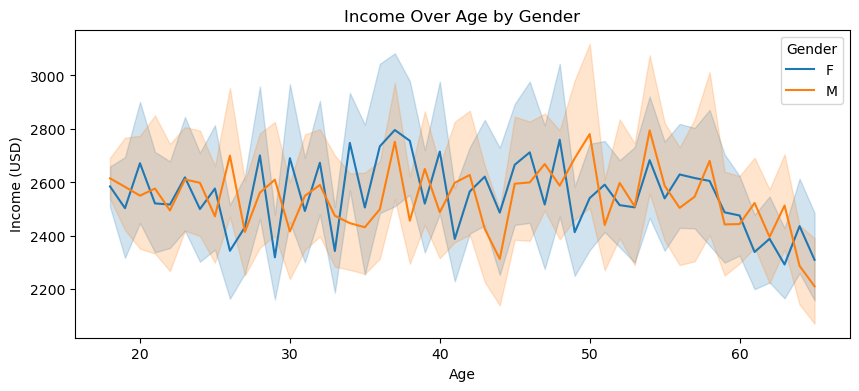

In [101]:
# Line Plot for Income Over Age
plt.figure(figsize=(10,4))
sns.lineplot(data=df, x='Age', y='Income (USD)', hue='Gender')
plt.title('Income Over Age by Gender')
plt.xlabel('Age')
plt.ylabel('Income (USD)')
plt.show()


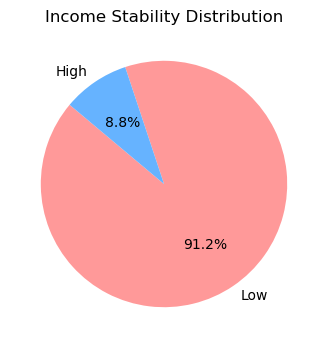

In [88]:
# Pie Chart for Income Stability Distribution
income_stability_counts = df['Income Stability'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(income_stability_counts, labels=income_stability_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Income Stability Distribution')
plt.show()


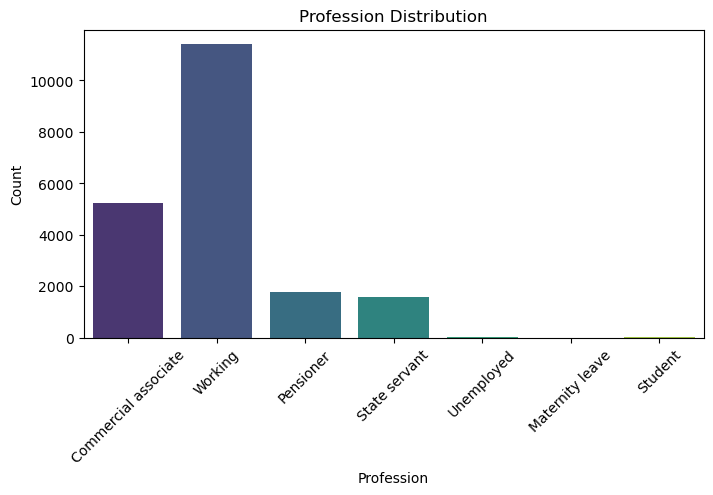

In [100]:
# Count Plot for Profession Distribution
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Profession', palette='viridis')
plt.title('Profession Distribution')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


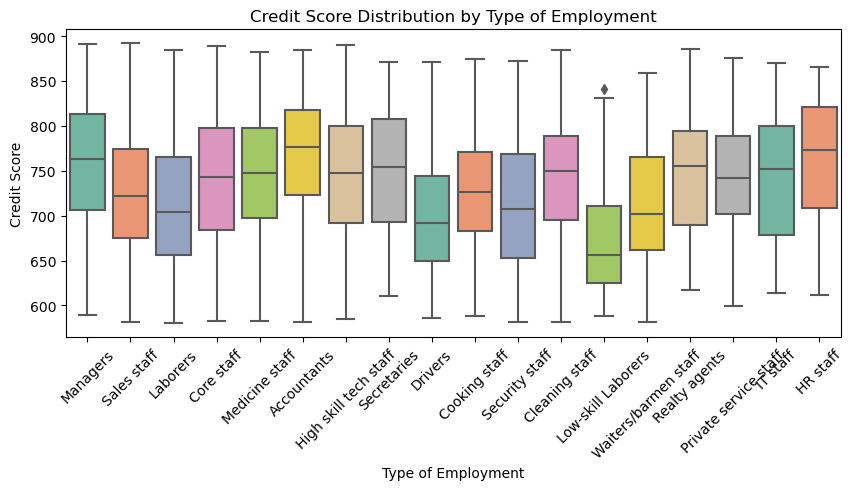

In [99]:
# Box Plot for Credit Score by Type of Employment
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='Type of Employment', y='Credit Score', palette='Set2')
plt.title('Credit Score Distribution by Type of Employment')
plt.xlabel('Type of Employment')
plt.ylabel('Credit Score')
plt.xticks(rotation=45)
plt.show()


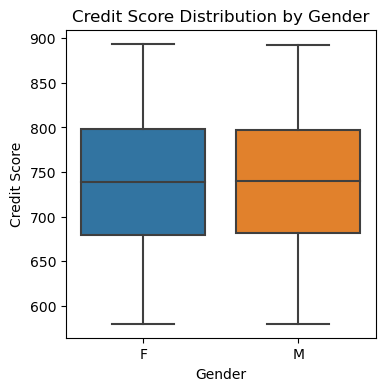

In [117]:
#Box Plot for Credit Score by Gender
plt.figure(figsize=(4, 4))
sns.boxplot(data=df, x='Gender', y='Credit Score')
plt.title('Credit Score Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Credit Score')
plt.show()
